# Fancy Indexing
## Started 01/22/2018
### @ 2116 :)

"Fancy indexing" is just passing arrays of indices as the index

In [1]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
x

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74])

In [2]:
# option 1
[x[3], x[7], x[2]]

[71, 86, 14]

In [3]:
# option 2
ind = [3, 7, 2]
x[ind]

array([71, 86, 14])

In [4]:
# option 3
#x[[3, 7, 2]]
# this actually modifies x!

In [5]:
# the index array passed is the form to be filled

ind = np.array([[3, 7],
             [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [6]:
# can pass an array as an index for any dimension
X = np.arange(12).reshape((3,4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [7]:
# giving a column vector and row vector will broadcast all pairs
# of indices
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])

X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [8]:
X[row, col] # (0,2), (1,1), (2,3)

array([ 2,  5, 11])

__Remember__, the returned array reflects the shape of the __index__ not the shape of the original array

## Combining fancy indexing with previous slicing techniques

In [9]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [10]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [11]:
mask = np.array([1, 0, 1, 0], dtype=bool)

X[:, mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

## Ex: selecting random points

In [34]:
mean = [0, 0]
cov = [[1, 2],
      [2, 5]]

X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

(-10, 8)

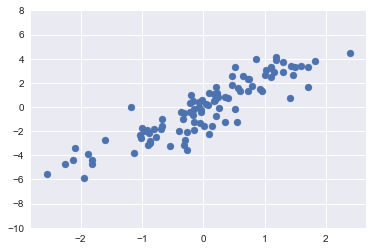

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

plt.scatter(X[:, 0], X[:, 1]);
plt.ylim(-10, 8)

In [36]:
indices = np.random.choice(100, 20, replace=False)
indices

array([92, 94, 84, 34, 54, 16,  4, 30, 65, 25, 29, 14, 73, 69, 61, 13, 78,
       46, 36, 40])

In [37]:
selection = X[indices]
selection.shape

(20, 2)

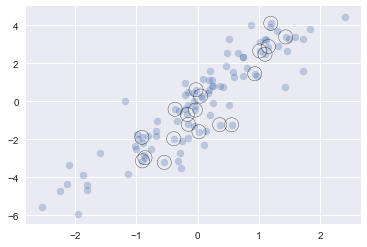

In [54]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3) # replot what we had before

plt.scatter(selection[:, 0], selection[:, 1],
           facecolor='none', edgecolor= 'k', s=200); # overlay our selection as circles

## Modifying Values with Fancy Indexing

In [56]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99 #modify multiple values at once
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [58]:
x[i] -= 10 #can modify while indexing
print(x)

[ 0 79 79  3 79  5  6  7 79  9]


In [64]:
x = np.zeros(10)
x

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [65]:
ind = [2, 3, 3, 4, 4, 4]
x[ind] += 1
x

array([ 0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.])

You would think that position 3 would be 2, and position 4 would be 3. This would be the case if the index and the assigment happened in sequence. What instead happens is the indexes are evaluated, and then the assigment made.

In [66]:
x = np.zeros(10)
np.add.at(x, ind, 1) #add 1 to x at the ind points
print(x)

[ 0.  0.  1.  2.  3.  0.  0.  0.  0.  0.]


In [69]:
np.random.seed(42)
x = np.random.randn(100) # 100 random numbers. Centered on 0?
x[1:10]

array([-0.1382643 ,  0.64768854,  1.52302986, -0.23415337, -0.23413696,
        1.57921282,  0.76743473, -0.46947439,  0.54256004])

In [70]:
bins = np.linspace(-5, 5, 20) #20 values evenly spaced between -5 and 5
counts = np.zeros_like(bins) # 20 zeros?
print('bins: ', bins)
print('counts: ', counts)

bins:  [-5.         -4.47368421 -3.94736842 -3.42105263 -2.89473684 -2.36842105
 -1.84210526 -1.31578947 -0.78947368 -0.26315789  0.26315789  0.78947368
  1.31578947  1.84210526  2.36842105  2.89473684  3.42105263  3.94736842
  4.47368421  5.        ]
counts:  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]


In [74]:
i = np.searchsorted(bins, x) # sort x(why?), and return an index value for each value in x, corresponding
# to the bin it falls in in bins. So a list 100 values long, with values from 1-20.
# actually is telling you where you would insert the values of x so that the order of bins would be
# preserved. bins should be a sorted list

In [75]:
i[1:10] # confirmed

array([10, 11, 13, 10, 10, 13, 11,  9, 11], dtype=int64)

In [77]:
np.add.at(counts, i, 1) # add 1 to counts where the i tells you to. 
print('counts: ', counts)

counts:  [  0.   0.   0.   0.   0.   2.   6.  14.  18.  46.  44.  34.  20.  14.   2.
   0.   0.   0.   0.   0.]


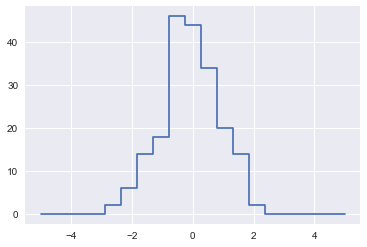

In [78]:
plt.plot(bins, counts, linestyle='steps')

In [79]:
t = np.linspace(-5, 5)
t

array([-5.        , -4.79591837, -4.59183673, -4.3877551 , -4.18367347,
       -3.97959184, -3.7755102 , -3.57142857, -3.36734694, -3.16326531,
       -2.95918367, -2.75510204, -2.55102041, -2.34693878, -2.14285714,
       -1.93877551, -1.73469388, -1.53061224, -1.32653061, -1.12244898,
       -0.91836735, -0.71428571, -0.51020408, -0.30612245, -0.10204082,
        0.10204082,  0.30612245,  0.51020408,  0.71428571,  0.91836735,
        1.12244898,  1.32653061,  1.53061224,  1.73469388,  1.93877551,
        2.14285714,  2.34693878,  2.55102041,  2.75510204,  2.95918367,
        3.16326531,  3.36734694,  3.57142857,  3.7755102 ,  3.97959184,
        4.18367347,  4.3877551 ,  4.59183673,  4.79591837,  5.        ])

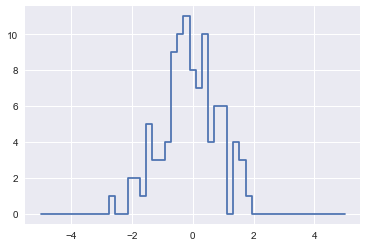

In [81]:
s = np.zeros_like(t)
i = np.searchsorted(t, x)
np.add.at(s, i, 1)
plt.plot(t, s, linestyle='steps')

This routine works well for small sample sizes. But numpy's built in ``np.histogram(data, bins)`` is more flexible and optimized for larger arrays

In [88]:
counts, edges = np.histogram(x, bins) # bins is size 20, but counts is size 19...

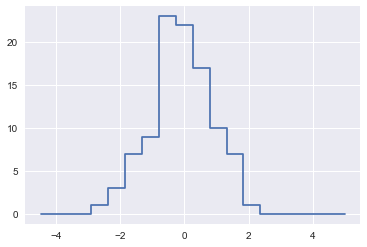

In [86]:
plt.plot(bins[1:], counts, linestyle='steps')

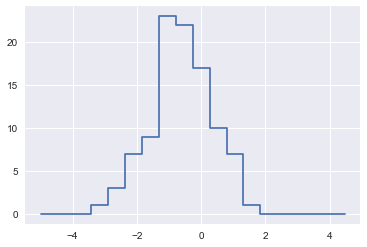

In [87]:
plt.plot(bins[:-1], counts, linestyle='steps')

## Completed 01/23/2018